# Power Laws: Detecting Anomalies in Usage
Energy consumption of buildings has steadily increased. There is an increasing realization that many buildings do not perform as intended by their designers. Typical buildings consume 20% more energy than necessary due to faulty construction, malfunctioning equipment, incorrectly configured control systems and inappropriate operating procedures.

The building systems may fail to meet the performance expectations due to various faults. Poorly maintained, degraded, and improperly controlled equipment wastes an estimated 15% to 30% of energy used in commercial buildings.

Therefore, it is of great potential to develop automatic, quick-responding, accurate and reliable fault detection and to provide diagnosis schemes to ensure the optimal operations of systems to save energy.

Schneider Electric already has relevant offers, but would like to determine if alternative techniques can add new detections / functionalities, bring gain in precision, or operate with less data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import power_utils

%matplotlib inline

In [2]:
explore, test = power_utils.import_data()

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
explore.shape

(43668606, 12)

In [4]:
explore.head()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,activity,holiday,temperature,distance
0,2,2015-06-11 00:00:00,2035.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,20.033333,16.317674
1,2,2015-06-11 00:15:00,2074.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
2,2,2015-06-11 00:30:00,2062.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
3,2,2015-06-11 00:45:00,2025.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN
4,2,2015-06-11 01:00:00,2034.0,2015-06-11,334_61,main meter,Wh,2000.0,office,0.0,NaN,NaN


In [5]:
explore.dtypes

meter_id                     object
timestamp            datetime64[ns]
values                      float64
date                         object
site_id                      object
meter_description            object
units                        object
surface                     float64
activity                     object
holiday                     float64
temperature                 float64
distance                    float64
dtype: object

The data set has 43+ million records with 3 categorical variables, 4 numerical variables and 2 date variables

In [5]:
categorical_variables = ['meter_id', 'site_id', 'meter_description', 'units', 'activity', 'holiday']
numeric_variables = ['values', 'surface', 'temperature', 'distance']
time_variables = ['timestamp', 'date']

In [7]:
for var in categorical_variables:
    print("{}: {} levels".format(var, len(explore[var].unique())))

meter_id: 187 levels
site_id: 3 levels
meter_description: 25 levels
units: 5 levels
activity: 4 levels
holiday: 2 levels


There are 187 unique meters in 3 sites with 35 types and 5 unique units and 4 types of building activities

In [8]:
explore.describe()

,values,surface,holiday,temperature,distance
count,2.720098e+07,1.398200e+06,4.366861e+07,1.246938e+06,1.246938e+06
mean,1.489619e+08,5.347161e+03,2.893502e-02,1.578664e+01,1.010447e+01
std,5.453536e+11,1.161193e+03,1.676239e-01,4.204572e+00,7.248390e-01
min,-4.838107e+06,2.000000e+03,0.000000e+00,-1.900000e+00,8.992769e+00
25%,2.434100e+04,5.750000e+03,0.000000e+00,1.300000e+01,1.012582e+01
50%,1.675234e+05,5.750000e+03,0.000000e+00,1.600000e+01,1.012582e+01
75%,5.476100e+05,5.750000e+03,0.000000e+00,1.900000e+01,1.012582e+01
max,2.011201e+15,5.750000e+03,1.000000e+00,4.130000e+01,1.973414e+01


In [9]:
explore.groupby('site_id').count()

,meter_id,timestamp,values,date,meter_description,units,surface,activity,holiday,temperature,distance
site_id,,,,,,,,,,,
038,42270406,42270406,25804688,42270406,42270406,39978637,0,42270406,42270406,0,0
234_203,1248000,1248000,1246349,1248000,1248000,1248000,1248000,1248000,1248000,1234456,1234456
334_61,150200,150200,149948,150200,150200,150200,150200,150200,150200,12482,12482


Site ID '038' has no surface, temperature, distance measurements yet has the majority of observations by far. 

39% of the 'value' fields are missing for '038' while the other sites have < 1% missing 'value'

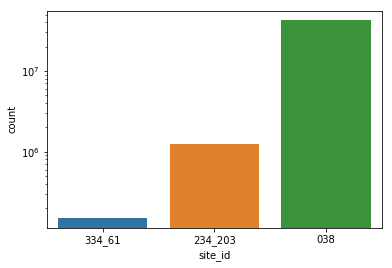

In [10]:
p = sns.countplot(x="site_id", data=explore)
p.set(yscale="log");

In [11]:
explore.groupby("meter_description").count()

,meter_id,timestamp,values,date,site_id,units,surface,activity,holiday,temperature,distance
meter_description,,,,,,,,,,,
Lighting,35856,35856,35822,35856,35856,35856,35856,35856,35856,35685,35685
RTE meter,509282,509282,486644,509282,509282,509282,0,509282,509282,0,0
RTE meter: cos phi,509282,509282,479018,509282,509282,0,0,509282,509282,0,0
RTE meter: demand,509282,509282,485742,509282,509282,0,0,509282,509282,0,0
RTE meter: reactive,509282,509282,485743,509282,509282,0,0,509282,509282,0,0
Test Bay,73152,73152,73144,73152,73152,73152,73152,73152,73152,72381,72381
cold group,509282,509282,493543,509282,509282,509282,0,509282,509282,0,0
compressed air,509282,509282,494541,509282,509282,509282,0,509282,509282,0,0
cuisine,509282,509282,487769,509282,509282,509282,0,509282,509282,0,0


The majority of missing 'values' occur on 'heating', 'outside temperature', 'temperature' and 'total workers' types of 'meter_description' with 88%, 86%, 86%, and 83% missing, respectively

'other' type of 'meter_descriptions' also have a high missing 'value' rate with 21% missing. Unfortunately 'other' meters represent more than half of the meters

We do not see any 'units' measurements on any "RTE meter: %" types or on "main meter: %"

'surface', 'temperature' and 'distance' measurements are only available on 'Lighting', 'Test Bay', 'elevators', 'generator', 'heating', 'lighting, 'main meter', 'other', 'virtual main', 'virtual meter' types with significant missing values for each of these measurements on 'heating', 'lighting', 'main meter', 'other', and 'virtual meter' types


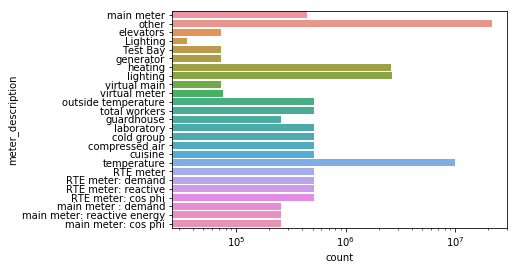

In [12]:
p = sns.countplot(y="meter_description", data=explore)
p.set(xscale="log");

In [13]:
explore.groupby("activity").count()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,holiday,temperature,distance
activity,,,,,,,,,,,
general,8148512,8148512,4142242,8148512,8148512,8148512,5856743,0,8148512,0,0
laboratory,8657794,8657794,4254601,8657794,8657794,8657794,8657794,0,8657794,0,0
office,23551967,23551967,15822180,23551967,23551967,23551967,23551967,1398200,23551967,1246938,1246938
restaurant,3310333,3310333,2981962,3310333,3310333,3310333,3310333,0,3310333,0,0


'restaurant' activities have the least missing 'values' rate at 10%.

'general' activities have 28% missing 'units'.

'office' are the only activities with 'surface', 'temperature' and 'distance' measurements

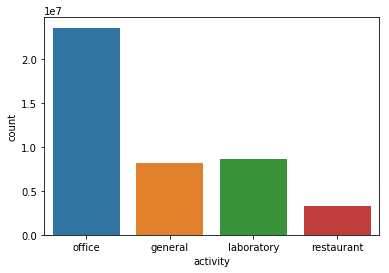

In [14]:
sns.countplot(x="activity", data=explore);

In [15]:
explore.groupby("units").count()

,meter_id,timestamp,values,date,site_id,meter_description,surface,activity,holiday,temperature,distance
units,,,,,,,,,,,
Wh,1398200,1398200,1396297,1398200,1398200,1398200,1398200,1398200,1398200,1246938,1246938
count,509282,509282,84480,509282,509282,509282,0,509282,509282,0,0
degree celsius,10694922,10694922,1528048,10694922,10694922,10694922,0,10694922,10694922,0,0
kWh,28774433,28774433,21977944,28774433,28774433,28774433,0,28774433,28774433,0,0


All observations in Wh have 'values' and 'surface' measurements. These are the only observations with 'temperature' and 'distance' measurements.

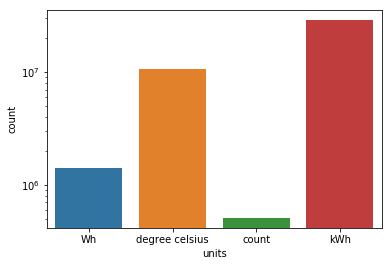

In [16]:
p = sns.countplot(x="units", data=explore)
p.set(yscale="log");

In [17]:
explore.groupby("holiday").count()

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,activity,temperature,distance
holiday,,,,,,,,,,,
0.0,42405054,42405054,26433494,42405054,42405054,42405054,40181541,1393592,42405054,1246574,1246574
1.0,1263552,1263552,767491,1263552,1263552,1263552,1195296,4608,1263552,364,364


Holidays represent less than 3% of the total sample

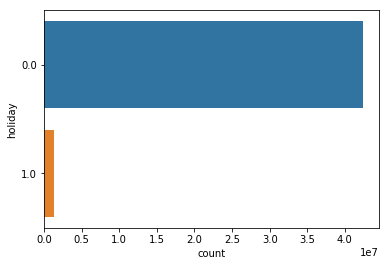

In [18]:
sns.countplot(y="holiday", data=explore);

In [19]:
explore.groupby(["site_id", "meter_description"]).count()

meter_id  timestamp    values      date  \
site_id meter_description                                                      
038     RTE meter                      509282     509282    486644    509282   
        RTE meter: cos phi             509282     509282    479018    509282   
        RTE meter: demand              509282     509282    485742    509282   
        RTE meter: reactive            509282     509282    485743    509282   
        cold group                     509282     509282    493543    509282   
        compressed air                 509282     509282    494541    509282   
        cuisine                        509282     509282    487769    509282   
        guardhouse                     254641     254641    248984    254641   
        heating                       2546410    2546410    278960   2546410   
        laboratory                     509282     509282    473191    509282   
        lighting                      2546410    2546410   2475552   2546410   
        main meter                     254641     254641    254571    254641   
        main meter : demand            254641     254641    254571    254641   
        main meter: cos phi            254641     254641    254571    254641   
        main meter: reactive energy    254641     254641    254571    254641   
        other                        20880562   20880562  16345689  20880562   
        outside temperature            509282     509282     73564    509282   
        temperature                   9930999    9930999   1392984   9930999   
        total workers                  509282     509282     84480    509282   
234_203 Lighting                        35856      35856     35822     35856   
        Test Bay                        73152      73152     73144     73152   
        elevators                       73152      73152     73144     73152   
        generator                       73152      73152     73144     73152   
        heating                         36432      36432     36246     36432   
        lighting                        73056      73056     72950     73056   
        main meter                     117792     117792    117557    117792   
        other                          692208     692208    691372    692208   
        virtual main                    73200      73200     72970     73200   
334_61  main meter                      74976      74976     74830     74976   
        virtual meter                   75224      75224     75118     75224   

                                        units  surface  activity   holiday  \
site_id meter_description                                                    
038     RTE meter                      509282        0    509282    509282   
        RTE meter: cos phi                  0        0    509282    509282   
        RTE meter: demand                   0        0    509282    509282   
        RTE meter: reactive                 0        0    509282    509282   
        cold group                     509282        0    509282    509282   
        compressed air                 509282        0    509282    509282   
        cuisine                        509282        0    509282    509282   
        guardhouse                     254641        0    254641    254641   
        heating                       2546410        0   2546410   2546410   
        laboratory                     509282        0    509282    509282   
        lighting                      2546410        0   2546410   2546410   
        main meter                     254641        0    254641    254641   
        main meter : demand                 0        0    254641    254641   
        main meter: cos phi                 0        0    254641    254641   
        main meter: reactive energy         0        0    254641    254641   
        other                        20880562        0  20880562  20880562   
        outside temperature            509282        0    509282    5092

Site 334_61 only has main and virtual meter types. Site 038 doesn't have a virtual meter.

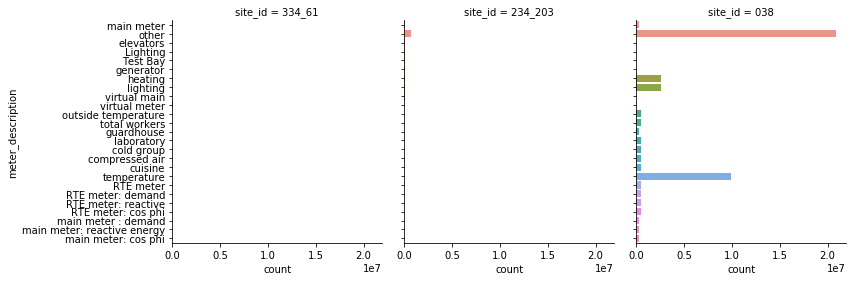

In [20]:
sns.factorplot(y="meter_description", 
               col="site_id",
               data=explore,
               kind="count");

In [21]:
explore.groupby(["site_id", "units"]).count()

meter_id  timestamp    values      date  \
site_id units                                                     
038     count             509282     509282     84480    509282   
        degree celsius  10694922   10694922   1528048  10694922   
        kWh             28774433   28774433  21977944  28774433   
234_203 Wh               1248000    1248000   1246349   1248000   
334_61  Wh                150200     150200    149948    150200   

                        meter_description  surface  activity   holiday  \
site_id units                                                            
038     count                      509282        0    509282    509282   
        degree celsius           10694922        0  10694922  10694922   
        kWh                      28774433        0  28774433  28774433   
234_203 Wh                        1248000  1248000   1248000   1248000   
334_61  Wh                         150200   150200    150200    150200   

                        temperature  distance  
site_id units                                  
038     count                     0         0  
        degree celsius            0         0  
        kWh                       0         0  
234_203 Wh                  1234456   1234456  
334_61  Wh                    12482     12482

We will need to cconvert Wh to kWh or vice versa in order to standardize the measurements

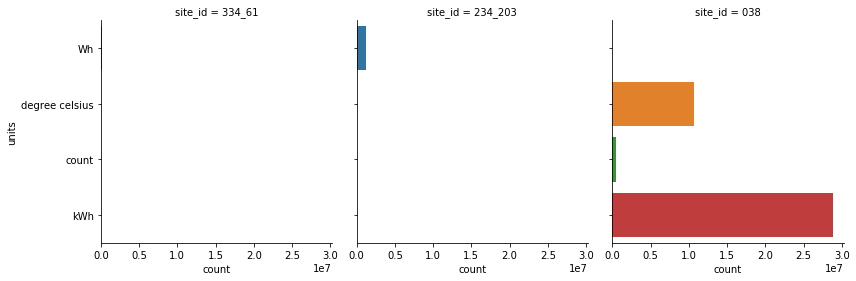

In [22]:
sns.factorplot(y="units", 
               col="site_id",
               data=explore,
               kind="count");

In [23]:
explore.groupby(["site_id", "activity"]).count()

meter_id  timestamp    values      date  \
site_id activity                                              
038     general      8148512    8148512   4142242   8148512   
        laboratory   8657794    8657794   4254601   8657794   
        office      22153767   22153767  14425883  22153767   
        restaurant   3310333    3310333   2981962   3310333   
234_203 office       1248000    1248000   1246349   1248000   
334_61  office        150200     150200    149948    150200   

                    meter_description     units  surface   holiday  \
site_id activity                                                     
038     general               8148512   5856743        0   8148512   
        laboratory            8657794   8657794        0   8657794   
        office               22153767  22153767        0  22153767   
        restaurant            3310333   3310333        0   3310333   
234_203 office                1248000   1248000  1248000   1248000   
334_61  office                 150200    150200   150200    150200   

                    temperature  distance  
site_id activity                           
038     general               0         0  
        laboratory            0         0  
        office                0         0  
        restaurant            0         0  
234_203 office          1234456   1234456  
334_61  office            12482     12482

Site 038 contains the only non-offices in the data set

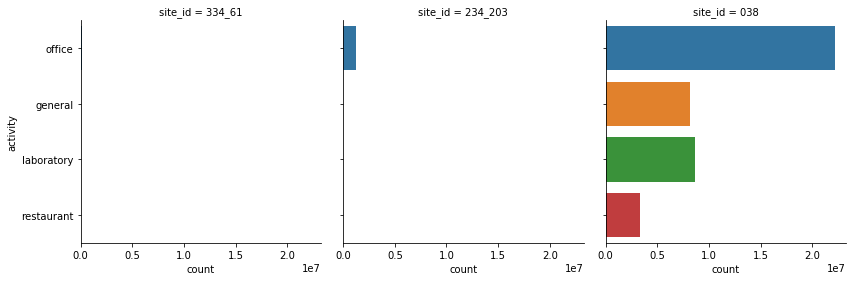

In [24]:
sns.factorplot(y="activity", 
               col="site_id",
               data=explore,
               kind="count");

In [25]:
explore.groupby(["site_id", "holiday"]).count()

meter_id  timestamp    values      date  meter_description  \
site_id holiday                                                               
038     0.0      41011462   41011462  25041805  41011462           41011462   
        1.0       1258944    1258944    762883   1258944            1258944   
234_203 0.0       1248000    1248000   1246349   1248000            1248000   
334_61  0.0        145592     145592    145340    145592             145592   
        1.0          4608       4608      4608      4608               4608   

                    units  surface  activity  temperature  distance  
site_id holiday                                                      
038     0.0      38787949        0  41011462            0         0  
        1.0       1190688        0   1258944            0         0  
234_203 0.0       1248000  1248000   1248000      1234456   1234456  
334_61  0.0        145592   145592    145592        12118     12118  
        1.0          4608     4608      4608          364       364

site 234_203 does not have any holidays

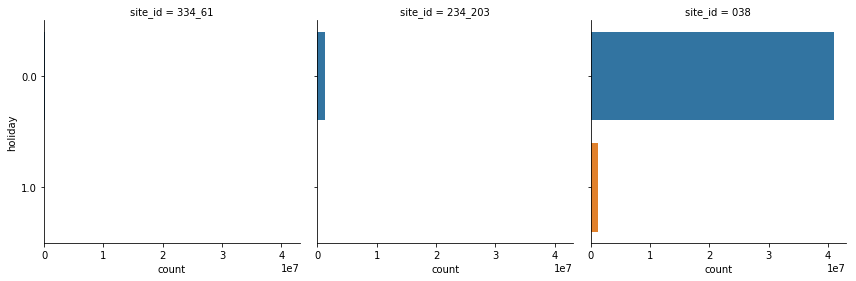

In [26]:
sns.factorplot(y="holiday", 
               col="site_id",
               data=explore,
               kind="count");

In [27]:
explore.groupby(["meter_description", "units"]).count()

,,meter_id,timestamp,values,date,site_id,surface,activity,holiday,temperature,distance
meter_description,units,,,,,,,,,,
Lighting,Wh,35856,35856,35822,35856,35856,35856,35856,35856,35685,35685
RTE meter,kWh,509282,509282,486644,509282,509282,0,509282,509282,0,0
Test Bay,Wh,73152,73152,73144,73152,73152,73152,73152,73152,72381,72381
cold group,kWh,509282,509282,493543,509282,509282,0,509282,509282,0,0
compressed air,kWh,509282,509282,494541,509282,509282,0,509282,509282,0,0
cuisine,kWh,509282,509282,487769,509282,509282,0,509282,509282,0,0
elevators,Wh,73152,73152,73144,73152,73152,73152,73152,73152,72381,72381
generator,Wh,73152,73152,73144,73152,73152,73152,73152,73152,72381,72381
guardhouse,kWh,254641,254641,248984,254641,254641,0,254641,254641,0,0


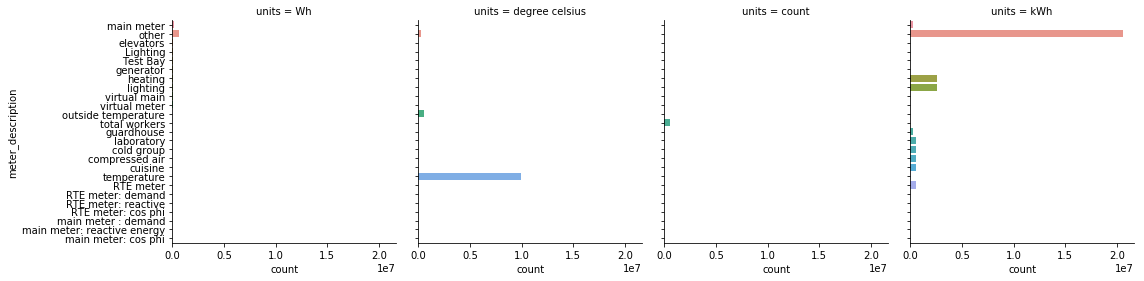

In [28]:
sns.factorplot(y="meter_description", 
               col="units", 
               data=explore, 
               kind="count");

In [29]:
explore.groupby(["meter_description", "activity"]).count()

,,meter_id,timestamp,values,date,site_id,units,surface,holiday,temperature,distance
meter_description,activity,,,,,,,,,,
Lighting,office,35856,35856,35822,35856,35856,35856,35856,35856,35685,35685
RTE meter,general,509282,509282,486644,509282,509282,509282,0,509282,0,0
RTE meter: cos phi,general,509282,509282,479018,509282,509282,0,0,509282,0,0
RTE meter: demand,general,509282,509282,485742,509282,509282,0,0,509282,0,0
RTE meter: reactive,general,509282,509282,485743,509282,509282,0,0,509282,0,0
Test Bay,office,73152,73152,73144,73152,73152,73152,73152,73152,72381,72381
cold group,laboratory,509282,509282,493543,509282,509282,509282,0,509282,0,0
compressed air,laboratory,509282,509282,494541,509282,509282,509282,0,509282,0,0
cuisine,restaurant,509282,509282,487769,509282,509282,509282,0,509282,0,0


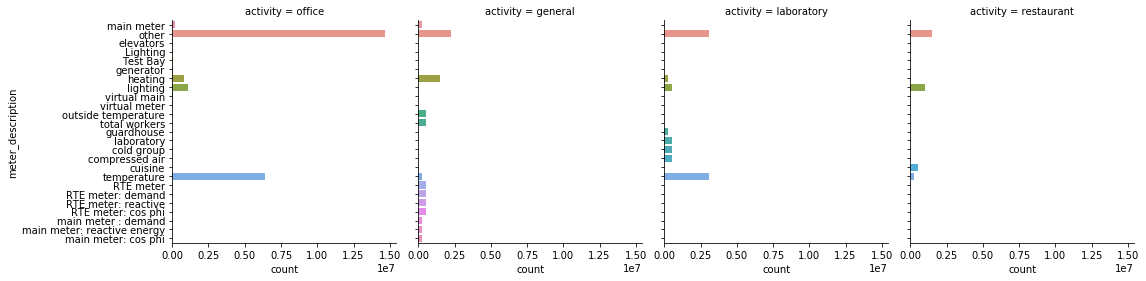

In [30]:
sns.factorplot(y="meter_description", 
               col="activity", 
               data=explore, 
               kind="count");

In [31]:
explore.groupby(["meter_description", "holiday"]).count()

meter_id  timestamp    values      date  \
meter_description           holiday                                            
Lighting                    0.0         35856      35856     35822     35856   
RTE meter                   0.0        494114     494114    472195    494114   
                            1.0         15168      15168     14449     15168   
RTE meter: cos phi          0.0        494114     494114    464618    494114   
                            1.0         15168      15168     14400     15168   
RTE meter: demand           0.0        494114     494114    471342    494114   
                            1.0         15168      15168     14400     15168   
RTE meter: reactive         0.0        494114     494114    471343    494114   
                            1.0         15168      15168     14400     15168   
Test Bay                    0.0         73152      73152     73144     73152   
cold group                  0.0        494114     494114    478903    494114   
                            1.0         15168      15168     14640     15168   
compressed air              0.0        494114     494114    479901    494114   
                            1.0         15168      15168     14640     15168   
cuisine                     0.0        494114     494114    473082    494114   
                            1.0         15168      15168     14687     15168   
elevators                   0.0         73152      73152     73144     73152   
generator                   0.0         73152      73152     73144     73152   
guardhouse                  0.0        247057     247057    241592    247057   
                            1.0          7584       7584      7392      7584   
heating                     0.0       2507002    2507002    306899   2507002   
                            1.0         75840      75840      8307     75840   
laboratory                  0.0        494114     494114    459292    494114   
                            1.0         15168      15168     13899     15168   
lighting                    0.0       2543626    2543626   2474969   2543626   
                            1.0         75840      75840     73533     75840   
main meter                  0.0        437521     437521    437070    437521   
                            1.0          9888       9888      9888      9888   
main meter : demand         0.0        247057     247057    246987    247057   
                            1.0          7584       7584      7584      7584   
main meter: cos phi         0.0        247057     247057    246987    247057   
                            1.0          7584       7584      7584      7584   
main meter: reactive energy 0.0        247057     247057    246987    247057   
                            1.0          7584       7584      7584      7584   
other                       0.0      20950882   20950882  16552629  20950882   
                            1.0        621888     621888    484432    621888   
outside temperature         0.0        494114     494114     71420    494114   
                            1.0         15168      15168      2144     15168   
temperature                 0.0       9635223    9635223   1352528   9635223   
                            1.0        295776     295776     40456    295776   
total workers               0.0        494114     494114     83712    494114   
                            1.0         15168      15168       768     15168   
virtual main                0.0         73200      73200     72970     73200   
virtual meter               0.0         72920      72920     72814     72920   
                            1.0          2304       2304      2304      2304   

                                      site_id     units  surface  activity  \
meter_description           holiday                                          
Lighting                    0.0         35856     35856    35856     35856   
RTE meter                   0.0        494

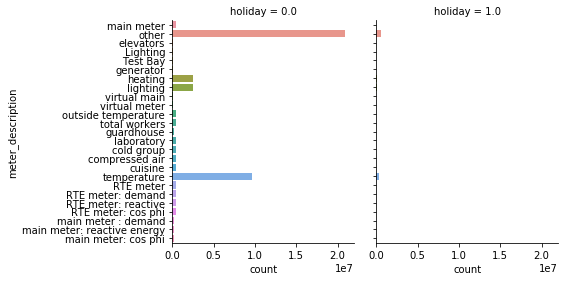

In [32]:
sns.factorplot(y="meter_description", 
               col="holiday", 
               data=explore, 
               kind="count");

In [33]:
explore.groupby(["units", "activity"]).count()

meter_id  timestamp    values      date   site_id  \
units          activity                                                        
Wh             office       1398200    1398200   1396297   1398200   1398200   
count          general       509282     509282     84480    509282    509282   
degree celsius general       763923     763923    100448    763923    763923   
               laboratory   3055692    3055692    220869   3055692   3055692   
               office       6620666    6620666    956607   6620666   6620666   
               restaurant    254641     254641    250124    254641    254641   
kWh            general      4583538    4583538   1743098   4583538   4583538   
               laboratory   5602102    5602102   4033732   5602102   5602102   
               office      15533101   15533101  13469276  15533101  15533101   
               restaurant   3055692    3055692   2731838   3055692   3055692   

                           meter_description  surface   holiday  temperature  \
units          activity                                                        
Wh             office                1398200  1398200   1398200      1246938   
count          general                509282        0    509282            0   
degree celsius general                763923        0    763923            0   
               laboratory            3055692        0   3055692            0   
               office                6620666        0   6620666            0   
               restaurant             254641        0    254641            0   
kWh            general               4583538        0   4583538            0   
               laboratory            5602102        0   5602102            0   
               office               15533101        0  15533101            0   
               restaurant            3055692        0   3055692            0   

                           distance  
units          activity              
Wh             office       1246938  
count          general            0  
degree celsius general            0  
               laboratory         0  
               office             0  
               restaurant         0  
kWh            general            0  
               laboratory         0  
               office             0  
               restaurant         0

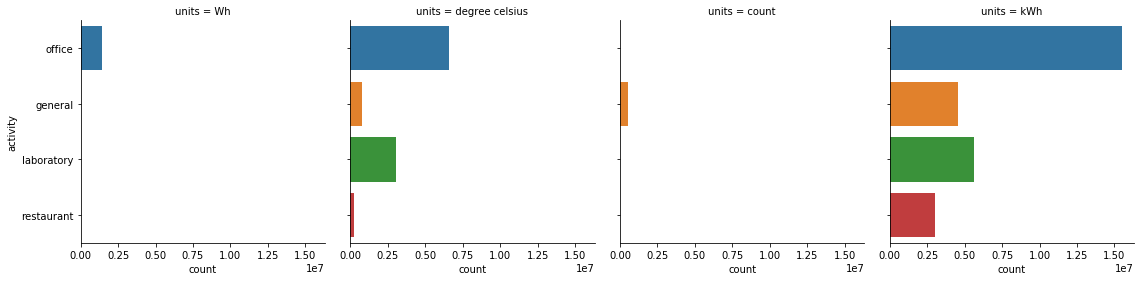

In [34]:
sns.factorplot(y="activity", 
               col="units", 
               data=explore, 
               kind="count");

In [35]:
explore.groupby(["units", "holiday"]).count()

meter_id  timestamp    values      date   site_id  \
units          holiday                                                      
Wh             0.0       1393592    1393592   1391689   1393592   1393592   
               1.0          4608       4608      4608      4608      4608   
count          0.0        494114     494114     83712    494114    494114   
               1.0         15168      15168       768     15168     15168   
degree celsius 0.0      10376394   10376394   1483662  10376394  10376394   
               1.0        318528     318528     44386    318528    318528   
kWh            0.0      27917441   27917441  21326167  27917441  27917441   
               1.0        856992     856992    651777    856992    856992   

                        meter_description  surface  activity  temperature  \
units          holiday                                                      
Wh             0.0                1393592  1393592   1393592      1246574   
               1.0                   4608     4608      4608          364   
count          0.0                 494114        0    494114            0   
               1.0                  15168        0     15168            0   
degree celsius 0.0               10376394        0  10376394            0   
               1.0                 318528        0    318528            0   
kWh            0.0               27917441        0  27917441            0   
               1.0                 856992        0    856992            0   

                        distance  
units          holiday            
Wh             0.0       1246574  
               1.0           364  
count          0.0             0  
               1.0             0  
degree celsius 0.0             0  
               1.0             0  
kWh            0.0             0  
               1.0             0

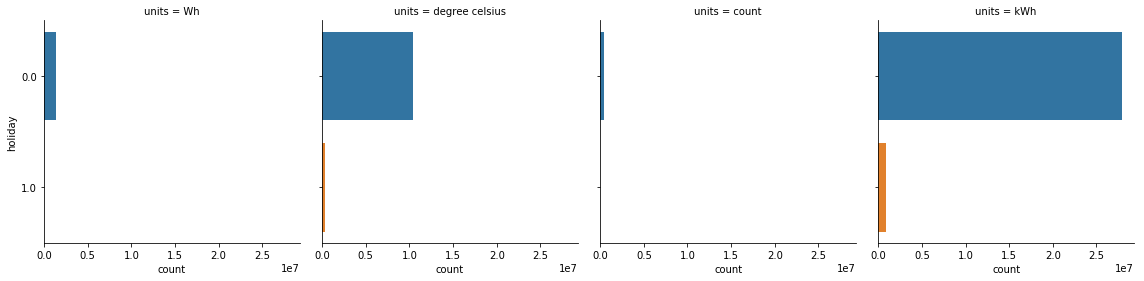

In [36]:
sns.factorplot(y="holiday", 
               col="units", 
               data=explore, 
               kind="count");

In [37]:
len(explore.meter_id.unique())

187

In [38]:
ts = explore
ts = ts.set_index('timestamp')
ts.index = ts.index.to_datetime()
ts = ts.sort_index()

import matplotlib.pyplot as plt

for i, meter in enumerate(explore.meter_id.unique()):
    ts.loc[ts.meter_id == meter].plot()    
    plt.savefig('./output/imgs/time_series_{}_{}.png'.format(meter, i))
    plt.close() 

In [39]:
ts.loc[ts.meter_id == '38_9709'].head()

,meter_id,values,date,site_id,meter_description,units,surface,activity,holiday,temperature,distance
timestamp,,,,,,,,,,,
2010-08-31 22:00:00,38_9709,35841.0,2010-08-31,038,other,kWh,NaN,office,0.0,NaN,NaN
2010-08-31 22:15:00,38_9709,35842.0,2010-08-31,038,other,kWh,NaN,office,0.0,NaN,NaN
2010-08-31 22:30:00,38_9709,35843.0,2010-08-31,038,other,kWh,NaN,office,0.0,NaN,NaN
2010-08-31 22:45:00,38_9709,35844.0,2010-08-31,038,other,kWh,NaN,office,0.0,NaN,NaN
2010-08-31 23:00:00,38_9709,35845.0,2010-08-31,038,other,kWh,NaN,office,0.0,NaN,NaN


In [44]:
ts['values'] = ts.apply(lambda r: (r['values'] / 1000) if r['units'] == 'Wh' else r['values'], axis=1)
ts['units'] = ts.apply(lambda r: 'kWh' if r['units'] == 'Wh' else r['units'], axis=1)

In [3]:
test.shape

(402635, 13)

In [6]:
for var in categorical_variables:
    print("{}: {} levels".format(var, len(test[var].unique())))

meter_id: 3 levels
site_id: 3 levels
meter_description: 3 levels
units: 2 levels
activity: 2 levels
holiday: 2 levels


In [14]:
test.meter_description.unique().tolist()

['virtual main', 'virtual meter', 'main meter']

In [12]:
test.activity.unique().tolist()

array(['office', 'general'], dtype=object)

In [7]:
common = explore.merge(test,on=['timestamp','meter_id'])
print(common.shape)
not_common = explore[(~explore.timestamp.isin(common.timestamp))&(~explore.meter_id.isin(common.meter_id))]

(402635, 23)


In [8]:
not_common.shape

(2805, 12)

In [9]:
not_common

,meter_id,timestamp,values,date,site_id,meter_description,units,surface,activity,holiday,temperature,distance
1398200,38_0,2010-08-31 22:00:00,10.9,2010-08-31,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1450174,38_0,2012-02-24 07:30:00,NaN,2012-02-24,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1519937,38_0,2014-02-20 00:15:00,NaN,2014-02-20,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1520075,38_0,2014-02-21 10:45:00,NaN,2014-02-21,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1520077,38_0,2014-02-21 11:15:00,NaN,2014-02-21,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1520087,38_0,2014-02-21 13:45:00,NaN,2014-02-21,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1520089,38_0,2014-02-21 14:15:00,NaN,2014-02-21,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1522041,38_0,2014-03-13 22:15:00,NaN,2014-03-13,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1522565,38_0,2014-03-19 09:15:00,NaN,2014-03-19,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN
1553689,38_0,2015-02-06 14:15:00,NaN,2015-02-06,038,outside temperature,degree celsius,NaN,general,0.0,NaN,NaN


In [21]:
clean_explore = explore[explore.meter_description.isin(test.meter_description.unique().tolist())]

In [22]:
clean_explore.shape

(595833, 12)

In [23]:
clean_explore = clean_explore[clean_explore.activity.isin(test.activity.unique().tolist())]

In [24]:
clean_explore.shape

(595833, 12)

In [36]:
explore = pd.read_csv('./tmp/train_prepared.csv', dtype={'meter_id': 'object', 'site_id': 'object'})

In [37]:
explore.shape

(765677, 28)

In [38]:
explore = explore.drop_duplicates(['timestamp', 'meter_id'])

In [39]:
explore.shape

(595833, 28)

In [40]:
categorical_variables = ['meter_id', 'site_id', 'meter_description', 'units', 'activity', 'holiday']
numeric_variables = ['values', 'surface', 'temperature', 'distance']
time_variables = ['timestamp', 'date']

In [41]:
for var in categorical_variables:
    print("{}: {} levels".format(var, len(explore[var].unique())))

meter_id: 6 levels
site_id: 3 levels
meter_description: 3 levels
units: 1 levels
activity: 2 levels
holiday: 2 levels


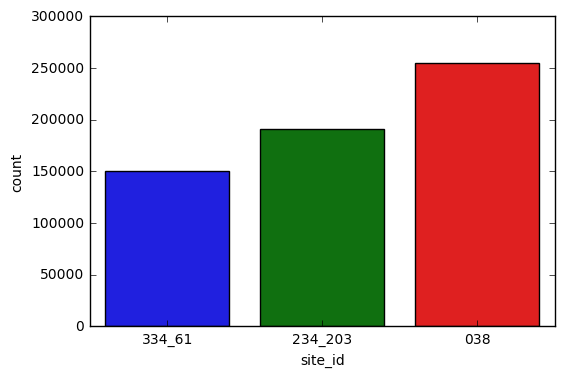

In [45]:
sns.countplot(x="site_id", data=explore);

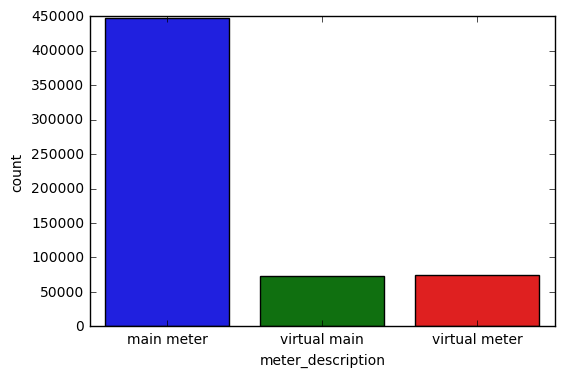

In [46]:
sns.countplot(x="meter_description", data=explore);

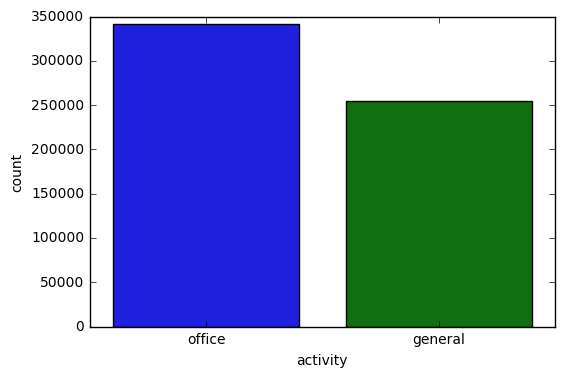

In [47]:
sns.countplot(x="activity", data=explore);